**Part A:**
From terminal, I ran 'nproc' which returned 10. Then I ran 'cat /proc/cpuinfo', as recommended on Piazza. This showed me that I actually have 11 total processers because the 10 returned by nproc was accounting for the first processer being the 0th one. Given the formula w + 2, with w being the number of worker threads and 2 of them are reserved for the client/parent threads:

11 = w + 2,
w = 9

So the max number of worker threads w that I can utilize is 9.

In [2]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name=filename, length=len(uploaded[filename])))


Saving server_outputPartD1.txt to server_outputPartD1.txt
Saving server_outputPartD2.txt to server_outputPartD2.txt
User uploaded file "server_outputPartD1.txt" with length 101278 bytes
User uploaded file "server_outputPartD2.txt" with length 102625 bytes


**Part B:**
With the code below I was able to calculate the following:
Utilization of T0: 0.05226861322081577
Utilization of T1: 0.046908640050697045

With this data, we can conclude that the load is pretty well balanced between the two.




In [3]:
# OPen server output
with open('server_outputPartB.txt', 'r') as file:
    lines = file.readlines()

# Dictionaries to store the data for T0 and T1
data_T0 = []
data_T1 = []

# Split data into respective lists based on the thread
for line in lines:
    if line.startswith("T0"):
        data_T0.append(line)
    elif line.startswith("T1"):
        data_T1.append(line)

# Function to calculate utilization
def calculate_utilization(data):
    total_utilization = 0
    for line in data:
        parts = line.split(",")
        # Assuming the 2nd value in the split is the utilization time
        utilization_time = float(parts[1])
        total_utilization += utilization_time
    average_utilization = total_utilization / len(data)
    return average_utilization

# Calculate utilization for each thread
utilization_T0 = calculate_utilization(data_T0)
utilization_T1 = calculate_utilization(data_T1)

print(f"Utilization of T0: {utilization_T0}")
print(f"Utilization of T1: {utilization_T1}")

if abs(utilization_T0 - utilization_T1) < 0.01:
    print("The load seems balanced between the two threads.")
else:
    print("The load doesn't seem balanced between the two threads.")


Utilization of T0: 0.05226861322081577
Utilization of T1: 0.046908640050697045
The load seems balanced between the two threads.


**Part C:**
"Is the improvement in response time linear or super-linear as the number of threads increases?"

With the plot I generated:

From 2 to 4 threads, the response time decreases significantly.
From 4 to 6 threads, the response time remains fairly constant, with only a minor decrease.
From 6 to 8 threads, the response time again remains quite stable, showing a very minor decrease.

The drastic decrease from 2 to 4 threads may hint towards a super-linear improvement initially. However, as the number of threads continues to increase (from 4 to 8), the improvement in response time plateaus, only showing minor changes. This behavior is not characteristic of either linear or super-linear improvement in this range.
So the improvement in response time as the number of threads increases isn't purely linear nor purely super-linear. The response time sees a potential super-linear improvement when moving from 2 to 4 threads but then plateaus going forward.

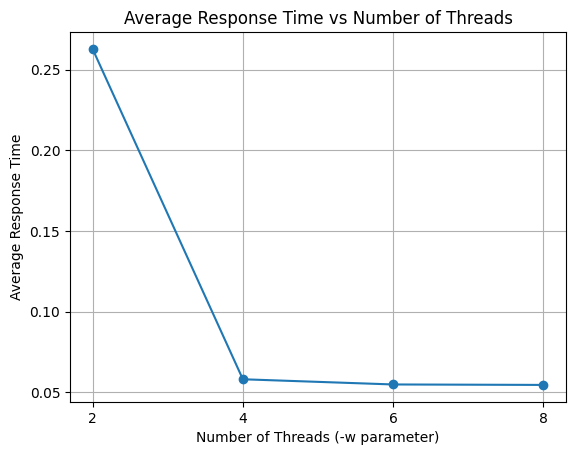

In [3]:
import matplotlib.pyplot as plt

def extract_response_times(file_path):
    """
    Extract response times from the server output file.
    """
    response_times = []

    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            # Checking if the line starts with a thread identifier like T0, T1, ...
            if line.startswith("T"):
                parts = line.split(",")
                sent_time = float(parts[0].split(":")[-1])  # Extracting the sent time after the colon
                completion_time = float(parts[-1])  # Last value in the split is the completion time
                response_time = completion_time - sent_time
                response_times.append(response_time)

    return response_times


def calculate_average_response_time(response_times):
    """
    Calculate the average of a list of response times.
    """
    return sum(response_times) / len(response_times)

# Paths to the server output files (corrected file names)
files = [
    "server_outputPartB.txt",
    "server_outputPartC4.txt",
    "server_outputPartC6.txt",
    "server_outputPartC8.txt"
]

# Lists to store results
worker_counts = [2, 4, 6, 8]
avg_response_times = []

# Extracting data from each file and calculating average response time
for file in files:
    response_times = extract_response_times(file)
    avg_response_time = calculate_average_response_time(response_times)
    avg_response_times.append(avg_response_time)

# Plotting the results
plt.plot(worker_counts, avg_response_times, marker='o')
plt.title('Average Response Time vs Number of Threads')
plt.xlabel('Number of Threads (-w parameter)')
plt.ylabel('Average Response Time')
plt.xticks(worker_counts)
plt.grid(True)
plt.show()


**Part D:**
As seen in the plot generated below, The rejection results of both './server_multi -w 1 -q 10', and './server_multi -w 2 -q 10' have been plotted.

Given that X is the rejection rate with 1 worker, the question asks if X/W is the rejection rate with W workers. For 1 worker (W = 1): X/W = 0.03/1 = 0.03. This is accurate as it lines up with my plot. Then, for 2 workers (W=2):
X/W = 0.03/2 = 0.015

The results indicated that the rejection ratio with 2 workers was 0.00, which doesn't match with 0.015.

So based on the provided results:
The statement "if X is the rejection rate with 1 worker, then X/W is the rejection rate with W workers" is not true.

Motivation:
I guess the idea behind the statement is that as the number of workers goes up, each worker will handle a portion of the load, reducing the rejection rate proportionally. In a perfect scenario the rejection rate would decrease linearly with the increase in the number of workers. But the real world is not made up of perfect scenarios so the actual results, as seen here, can deviate from this model. In the experiment we were supposed to do it seems that adding one more worker was able to handle all requests without any rejections. It shows that doubling the workers doesn't just halve the rejection rate. In this case it eliminated rejections entirely.







Rejection ratio with 1 worker: 0.03
Rejection ratio with 2 workers: 0.00


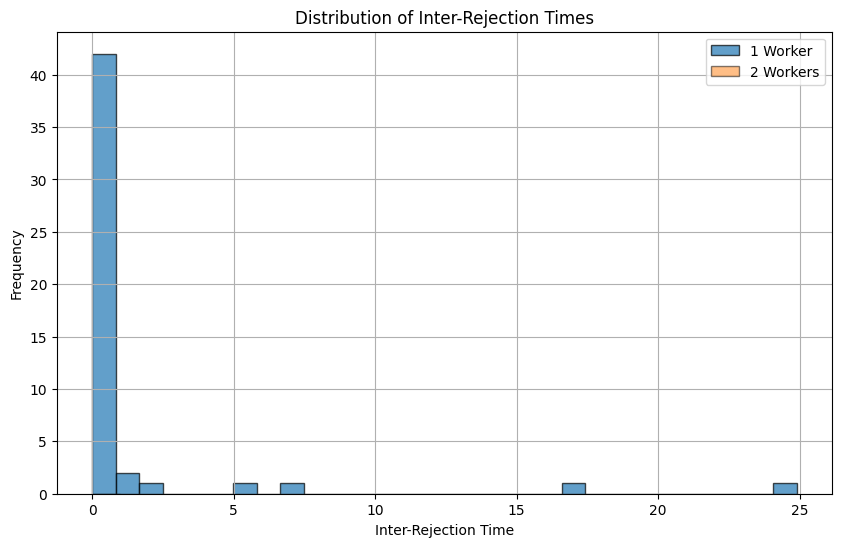

In [4]:
import matplotlib.pyplot as plt

def parse_file(file_path):
    with open(file_path, "r") as file:
        lines = file.readlines()

    # Count total requests and rejections
    total_requests = len([line for line in lines if line.startswith(('T', 'X'))])
    rejections = len([line for line in lines if line.startswith('X')])

    rejection_times = [float(line.split(':')[1].split(',')[0]) for line in lines if line.startswith('X')]
    inter_rejection_times = [rejection_times[i+1] - rejection_times[i] for i in range(len(rejection_times)-1)]

    return total_requests, rejections, inter_rejection_times

# Parse both files
total_requests_1, rejections_1, inter_rejection_times_1 = parse_file("server_outputPartD1.txt")
total_requests_2, rejections_2, inter_rejection_times_2 = parse_file("server_outputPartD2.txt")

# Calculate rejection ratios
rejection_ratio_1 = rejections_1 / total_requests_1
rejection_ratio_2 = rejections_2 / total_requests_2

print(f"Rejection ratio with 1 worker: {rejection_ratio_1:.2f}")
print(f"Rejection ratio with 2 workers: {rejection_ratio_2:.2f}")

# Plotting for the first file
plt.figure(figsize=(10, 6))
plt.hist(inter_rejection_times_1, bins=30, edgecolor='k', alpha=0.7, label="1 Worker")
plt.hist(inter_rejection_times_2, bins=30, edgecolor='k', alpha=0.5, label="2 Workers")
plt.title('Distribution of Inter-Rejection Times')
plt.xlabel('Inter-Rejection Time')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()
